**DATA VISUALIZATION**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

In [ ]:
!gdown https://drive.google.com/file/d/1XyhVIZaKYZczlM2alun_fofilqTBq_9c/view?usp=drive_link

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1XyhVIZaKYZczlM2alun_fofilqTBq_9c
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1XyhVIZaKYZczlM2alun_fofilqTBq_9c/view?usp=drive_link
To: /content/view?usp=drive_link
92.3kB [00:00, 2.90MB/s]


In [ ]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
# Display the first few rows to understand the structure
print(data.head())


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [ ]:
# Framing the questions based on the Dataset
# Based on typical healthcare datasets,here are some questions which i framed:

# 1)Distribution of Age: What is the age distribution of the patients?
# 2)Gender and Stroke Occurrence: Does gender affect stroke occurrences?
# 3)Correlation of BMI with Stroke: Is there any correlation between BMI and stroke occurrences?
# 4)Hypertension and Stroke Relationship: How does hypertension relate to stroke occurrences?
# 5)Heart Disease and Stroke: Does a history of heart disease correlate with stroke incidents?

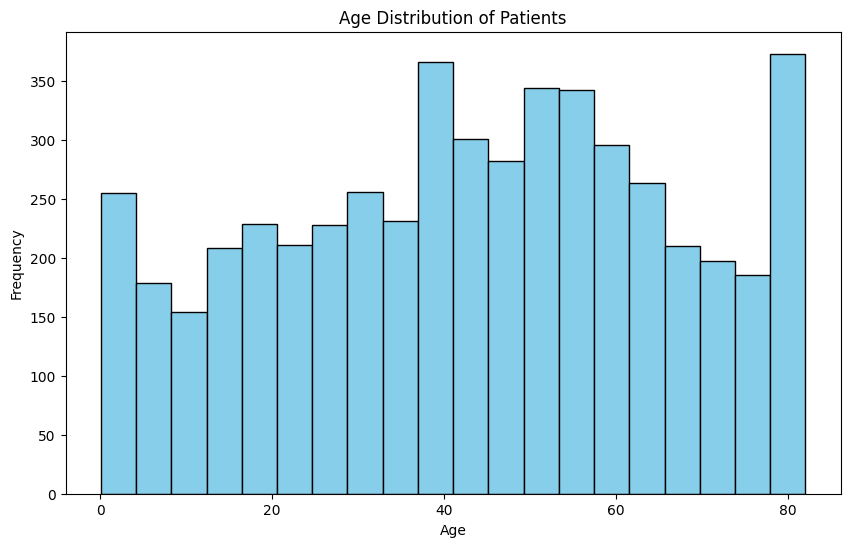

In [ ]:
#step2
#Plotting the graphs
#For the 1st question,i.e for the distribution of age,we need to plot the "Histogram"
import matplotlib.pyplot as plt

# Plotting the age distribution
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#for the 2nd question,i.e for Gender vs. Stroke Occurrence we need to create Bar Plot

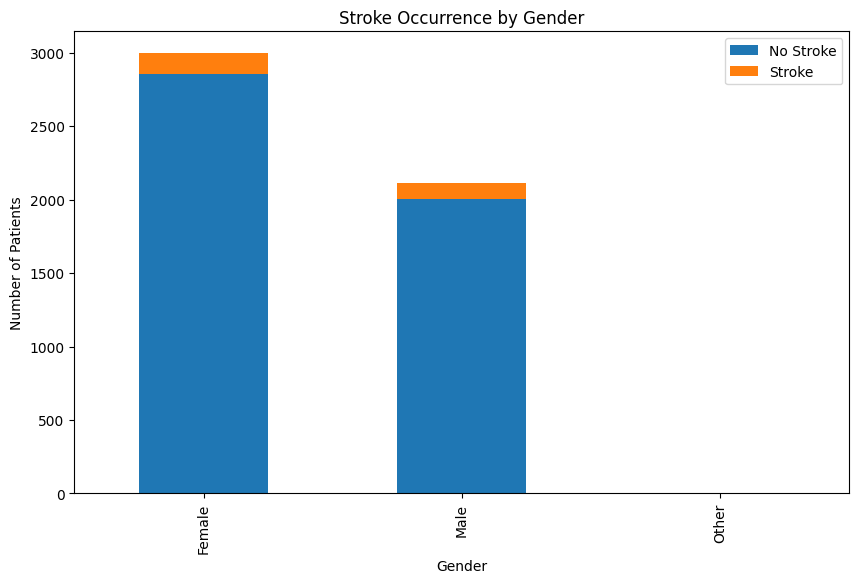

In [ ]:
# Count of strokes by gender
gender_stroke_count = data.groupby(['gender', 'stroke']).size().unstack()

# Bar plot for gender and stroke relationship
gender_stroke_count.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(10, 6))
plt.title('Stroke Occurrence by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.legend(['No Stroke', 'Stroke'])
plt.show()

In [ ]:
#for 3rd question,i.e for  BMI vs. Stroke we need to do Scatter Plot

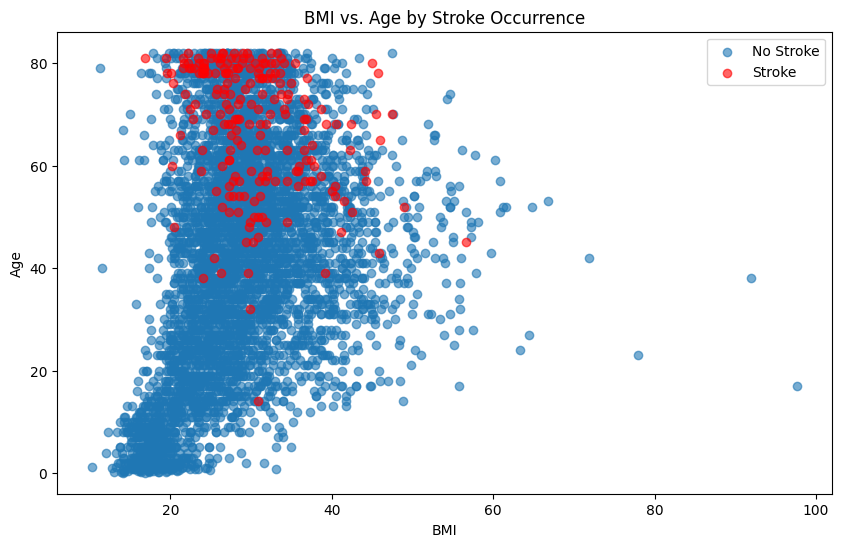

In [ ]:
# Scatter plot for BMI and stroke
plt.figure(figsize=(10, 6))
plt.scatter(data[data['stroke'] == 0]['bmi'], data[data['stroke'] == 0]['age'], label='No Stroke', alpha=0.6)
plt.scatter(data[data['stroke'] == 1]['bmi'], data[data['stroke'] == 1]['age'], label='Stroke', alpha=0.6, color='red')
plt.title('BMI vs. Age by Stroke Occurrence')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.legend()
plt.show()

In [ ]:
#for the 4th question,i.e,Hypertension and Stroke Relationship we need to do the Bar Plot

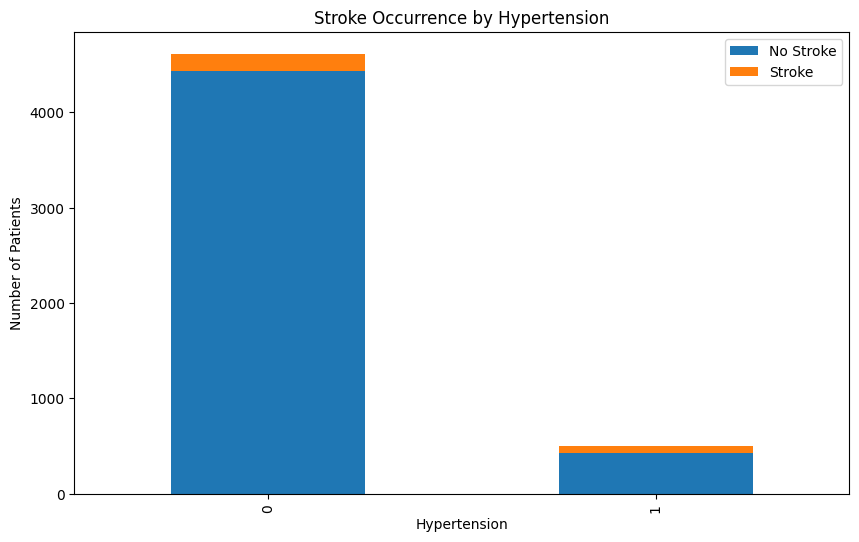

In [ ]:
# Count of strokes by hypertension status
ht_stroke_count = data.groupby(['hypertension', 'stroke']).size().unstack()

# Bar plot for hypertension and stroke relationship
ht_stroke_count.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(10, 6))
plt.title('Stroke Occurrence by Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Number of Patients')
plt.legend(['No Stroke', 'Stroke'])
plt.show()

In [ ]:
#And at last coming to the 5th question,i.e.,Heart Disease and Stroke Bar Plot is required

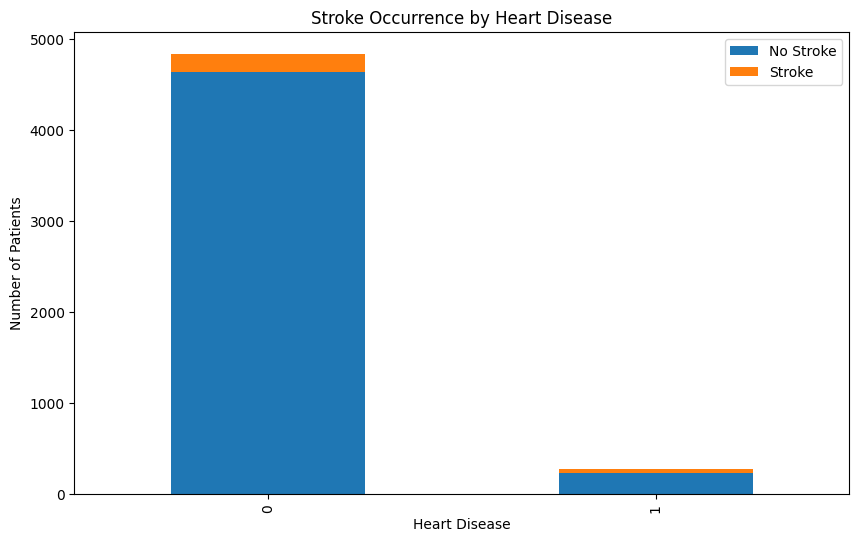

In [ ]:
# Count of strokes by heart disease status
hd_stroke_count = data.groupby(['heart_disease', 'stroke']).size().unstack()

# Bar plot for heart disease and stroke relationship
hd_stroke_count.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(10, 6))
plt.title('Stroke Occurrence by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Number of Patients')
plt.legend(['No Stroke', 'Stroke'])
plt.show()

In [ ]:
#Observations from the above graph

In [ ]:
#1)Age and Stroke: Older age groups typically exhibit a higher risk for stroke, highlighting age as a primary risk factor

In [ ]:
#2)Gender Impact: Gender-based differences might exist and could be linked to lifestyle or biological factors.

In [ ]:
#3)BMI Influence: High BMI may correlate with increased stroke risk, suggesting that weight management could be a preventative measure.

In [ ]:
#4)Hypertension and Stroke:correlation with hypertension underlines the importance of blood pressure control.

In [ ]:
#5)Heart Disease as a Risk Factor: The higher occurrence of strokes among those with heart disease emphasizes the need for heart disease prevention as part of stroke prevention strategies.

**DATA ENCODING**

In [3]:
import pandas as pd

In [ ]:
#Load the dataset

In [4]:
file_path = '/content/healthcare-dataset-stroke-data.csv.csv'  # Path to uploaded file
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv.csv')

 Step1-Residence_type encoding

In [5]:
data['Residence_type'] = data['Residence_type'].map({'Rural': 0, 'Urban': 1})

In [ ]:
#The Residence_type column initialy contains values such as "Rural" and "Urban",which are categorical text data.
#Most machine learning models cannot directlyhandle text data,so it's necessary to convert these values into numeric codes
#The .map() function is a convenient way to replace each categorical value with a numeric code:
#"Rural" is mapped to 0
#"Urban" is mapped to 1

Step2-Work_type Encoding

In [6]:
work_type_dummies = pd.get_dummies(data['work_type'], prefix='work_type')
work_type_dummies = work_type_dummies[['work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed']]

In [ ]:
#pd.get_dummies() creates binary columns for each work_type category
#Each new column contains a 1 or 0 to indicate whether that row's work_type matches the column name.
#For example, if work_type has values like Private, Self-employed, and Never_worked, pd.get_dummies() will create these new columns: work_type_Never_worked, work_type_Private, and work_type_Self-employed.

Step3-smoking_status Encoding

In [7]:
smoking_status_dummies = pd.get_dummies(data['smoking_status'], prefix='smoking_status')
smoking_status_dummies = smoking_status_dummies[['smoking_status_never smoked', 'smoking_status_formerly smoked', 'smoking_status_smokes']]


In [ ]:
#Similar to work_type, smoking_status is a categorical column with multiple possible values like never smoked, formerly smoked, and smokes.
#The code uses pd.get_dummies() to create a one-hot encoded version of smoking_status, generating a binary column for each smoking status.
#The columns retained are smoking_status_never smoked, smoking_status_formerly smoked, and smoking_status_smokes, as specified in the task.

 Step4-Concatenate and Drop Original Columns

In [8]:
data_model = pd.concat([data, work_type_dummies, smoking_status_dummies], axis=1)
data_model = data_model.drop(['Residence_type', 'work_type', 'smoking_status'], axis=1)


In [ ]:
#Concatenate New Columns:

#pd.concat() combines the original dataset (data) with the new columns created (work_type_dummies and smoking_status_dummies) along the columns axis (axis=1).
#This merges all the new binary columns into the original dataset.

#Drop Original Columns:

#Once we have the binary columns, the original columns Residence_type, work_type, and smoking_status are no longer needed, so we remove them using .drop().
#This keeps the dataset clean and free from redundant information.

Final Dataset (data_model)

In [ ]:
#The transformed dataset (data_model) now contains:
#Numeric columns for each encoded category, making it ready for model training.
#The original columns Residence_type, work_type, and smoking_status are removed, leaving only the encoded binary columns.
